In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.svm import SVC

In [2]:
train = []
test = []
with open('features.train', 'r') as f:
    for line in f:
        train.append([float(i) for i in line.split()])
with open('features.test', 'r') as f:
    for line in f:
        test.append([float(i) for i in line.split()])
        
train = np.array(train)
test = np.array(test)

In [3]:
x = []
y = []
for i in train:
    digit, intensity, symmetry = i[0], i[1], i[2]
    if digit == 8:
        y.append(1)
    else:
        y.append(-1)
    x.append([intensity, symmetry])

x = np.array(x)
y = np.array(y)

In [4]:
C = [10**i for i in [-5, -3, -1, 1, 3]]
print (C)

[1e-05, 0.001, 0.1, 10, 1000]


In [5]:
def my_kernel(x1, x2):
    tmp = (1 + np.dot(x1, x2.T))**2
    return tmp

In [6]:
clf = SVC(kernel='poly', C=C[0], degree=2, coef0=1, gamma=1)
clf.fit(x, y)

SVC(C=1e-05, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=2, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

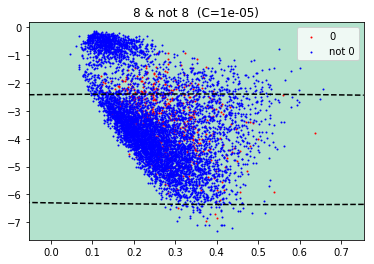

In [7]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

h = .008
x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
y_min, y_max = x[:, 1].min() - 0.3, x[:, 1].max() + 0.3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Pastel2'))


x0 = []
x_0 = []
for i, j in zip(x, y):
    if j == 1:
        x0.append(i)
    else:
        x_0.append(i)
x0 = np.array(x0)
x_0 = np.array(x_0)
plt.scatter(x0[:,0], x0[:,1], c='r', s=1, label='0')
plt.scatter(x_0[:,0], x_0[:,1], c='b', s=1, label='not 0')


ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 2], alpha=1,
           linestyles=['--', '-', '--'])
# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')
tmp = []
for i in clf.support_:
    tmp.append(x[i])
tmp = np.array(tmp)
ax.scatter(tmp[:, 0], tmp[:, 1], s=100,
           linewidth=1, facecolors='none')

plt.title('8 & not 8  (C=%s)' % str(C[0]))
plt.legend()
plt.savefig('12.png')
plt.show()

In [8]:
def cal_in_error(clf, x, y):
    pred = clf.predict(x)
    err = 0
    for i, j in zip(y, pred):
        if i != j:
            err += 1
    return err/len(x)

1e-05
0.001
0.1
10
1000
finish


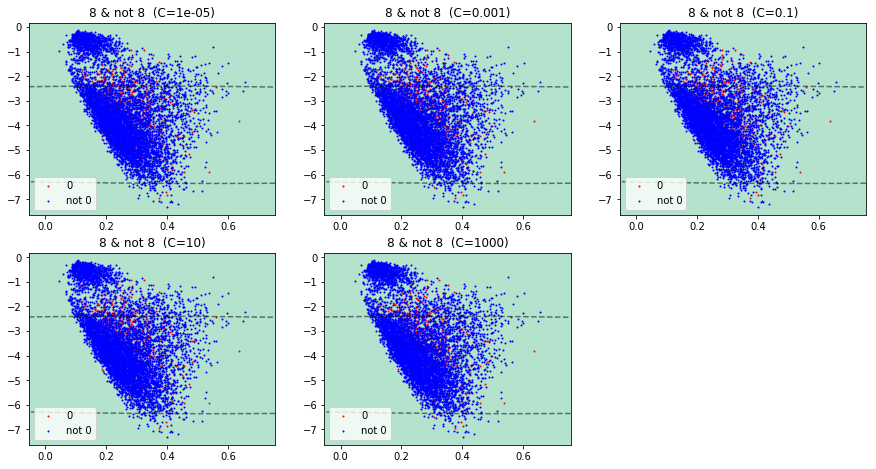

In [9]:
plt.figure(figsize = (15, 12))
Ein = []
for j, i in enumerate(C):
    plt.subplot(3, 3, j+1)
    print (i)
    
    # fit the model, don't regularize for illustration purposes
    clf = SVC(kernel='poly', C=C[0], degree=2, coef0=1, gamma=1)
    clf.fit(x, y)
    Ein.append(cal_in_error(clf, x, y))
    
    h = .008
    x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
    y_min, y_max = x[:, 1].min() - 0.3, x[:, 1].max() + 0.3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=plt.get_cmap('Pastel2'))
    
    # Plot the training points
    x0 = []
    x_0 = []
    for ii, jj in zip(x, y):
        if jj == 1:
            x0.append(ii)
        else:
            x_0.append(ii)
    x0 = np.array(x0)
    x_0 = np.array(x_0)
    plt.scatter(x0[:,0], x0[:,1], c='r', s=1, label='0')
    plt.scatter(x_0[:,0], x_0[:,1], c='b', s=1, label='not 0')
    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    plt.title('8 & not 8  (C=%s)' % str(i))
    plt.legend()

print ('finish')
plt.savefig('12_all.png')
plt.show()

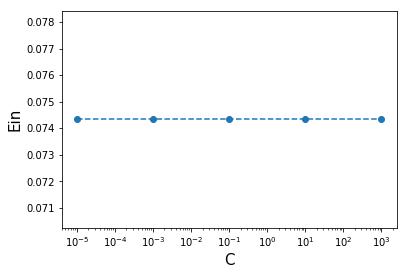

In [10]:
plt.semilogx(C, Ein, '--o')
plt.ylabel('Ein', fontsize = 15)
plt.xlabel('C', fontsize = 15)
plt.savefig('12_Ein.png')
plt.show()